# YOLO       
YOLO stands for "You Only Look Once," and it is an object detection algorithm used in computer vision and image processing. YOLO revolutionized real-time object detection by introducing a unified approach that simultaneously predicts bounding boxes and class probabilities for multiple objects within an image.           
                  
Traditional object detection algorithms perform region proposal and classification separately, which can be computationally expensive. YOLO, on the other hand, takes a different approach by dividing the input image into a grid and directly predicts bounding boxes and class probabilities within each grid cell.                
                 
Here's a high-level overview of how YOLO works:           
          
1. Input Image: YOLO takes an input image and divides it into a grid of cells. Each cell is responsible for detecting objects.
          
2. Bounding Box Prediction: For each grid cell, YOLO predicts bounding boxes that enclose objects within the cell. These bounding boxes consist of coordinates (x, y) for the box's center, width (w), and height (h).
              
3. Class Prediction: Along with bounding boxes, YOLO also predicts the probability of each class being present within each grid cell. It assigns a class label to each bounding box.
             
4. Non-max Suppression: After the bounding boxes and class probabilities are predicted, YOLO applies a technique called non-max suppression to remove redundant or overlapping bounding boxes. The algorithm selects the most confident bounding box for each object based on a threshold.        
             
The advantages of YOLO include real-time object detection capabilities, as it can process images and videos in near real-time. It also handles overlapping objects well, thanks to non-max suppression, and is capable of detecting multiple objects in a single pass.        
         
Since its introduction, several versions of YOLO have been developed, with improvements in accuracy and speed. YOLOv3 and YOLOv4 are notable versions that have achieved state-of-the-art performance on object detection tasks.

R-CNN (Region-based Convolutional Neural Network) and YOLO (You Only Look Once) are both popular object detection algorithms, but they employ different approaches. Here are the key differences between R-CNN and YOLO:      
         
**Approach:**  
R-CNN: R-CNN takes a two-stage approach. It first generates a set of region proposals using selective search or a similar algorithm. Then, each region proposal is classified using a CNN, and bounding box refinements are performed.           
YOLO: YOLO takes a one-stage approach. It divides the input image into a grid and directly predicts bounding boxes and class probabilities for each grid cell. YOLO performs both object localization and classification in a single pass.     
                 
**Speed:**            
R-CNN: R-CNN is slower compared to YOLO because it processes each region proposal independently, resulting in a significant computational overhead.           
YOLO: YOLO is faster than R-CNN because it predicts bounding boxes and class probabilities for the entire image in a single forward pass, eliminating the need for region proposal generation and subsequent classification.            
                  
**Accuracy:**                
R-CNN: R-CNN typically achieves higher accuracy than early versions of YOLO due to its two-stage approach and the ability to refine bounding box proposals.            
YOLO: While earlier versions of YOLO may sacrifice some accuracy for speed, recent iterations like YOLOv4 have made significant strides in improving accuracy, narrowing the gap between YOLO and R-CNN.          
            
**Performance on Small Objects:**           
R-CNN: R-CNN performs well in detecting small objects due to its region proposal mechanism, which can focus on potential object regions.         
YOLO: Earlier versions of YOLO had difficulties detecting small objects due to the fixed grid structure. However, recent versions, such as YOLOv4, have incorporated feature pyramid networks to address this issue, improving performance on small objects.           
               
Determining which algorithm is better depends on the specific use case and requirements. YOLO offers real-time performance and simplicity, making it suitable for applications where speed is crucial, such as video analysis and autonomous driving. R-CNN, on the other hand, may be more suitable when accuracy is of utmost importance, especially in scenarios with smaller objects or complex scenes.           
               
It's worth noting that the field of object detection is continuously evolving, and newer algorithms and variations are regularly introduced, striving to improve the balance between speed and accuracy.

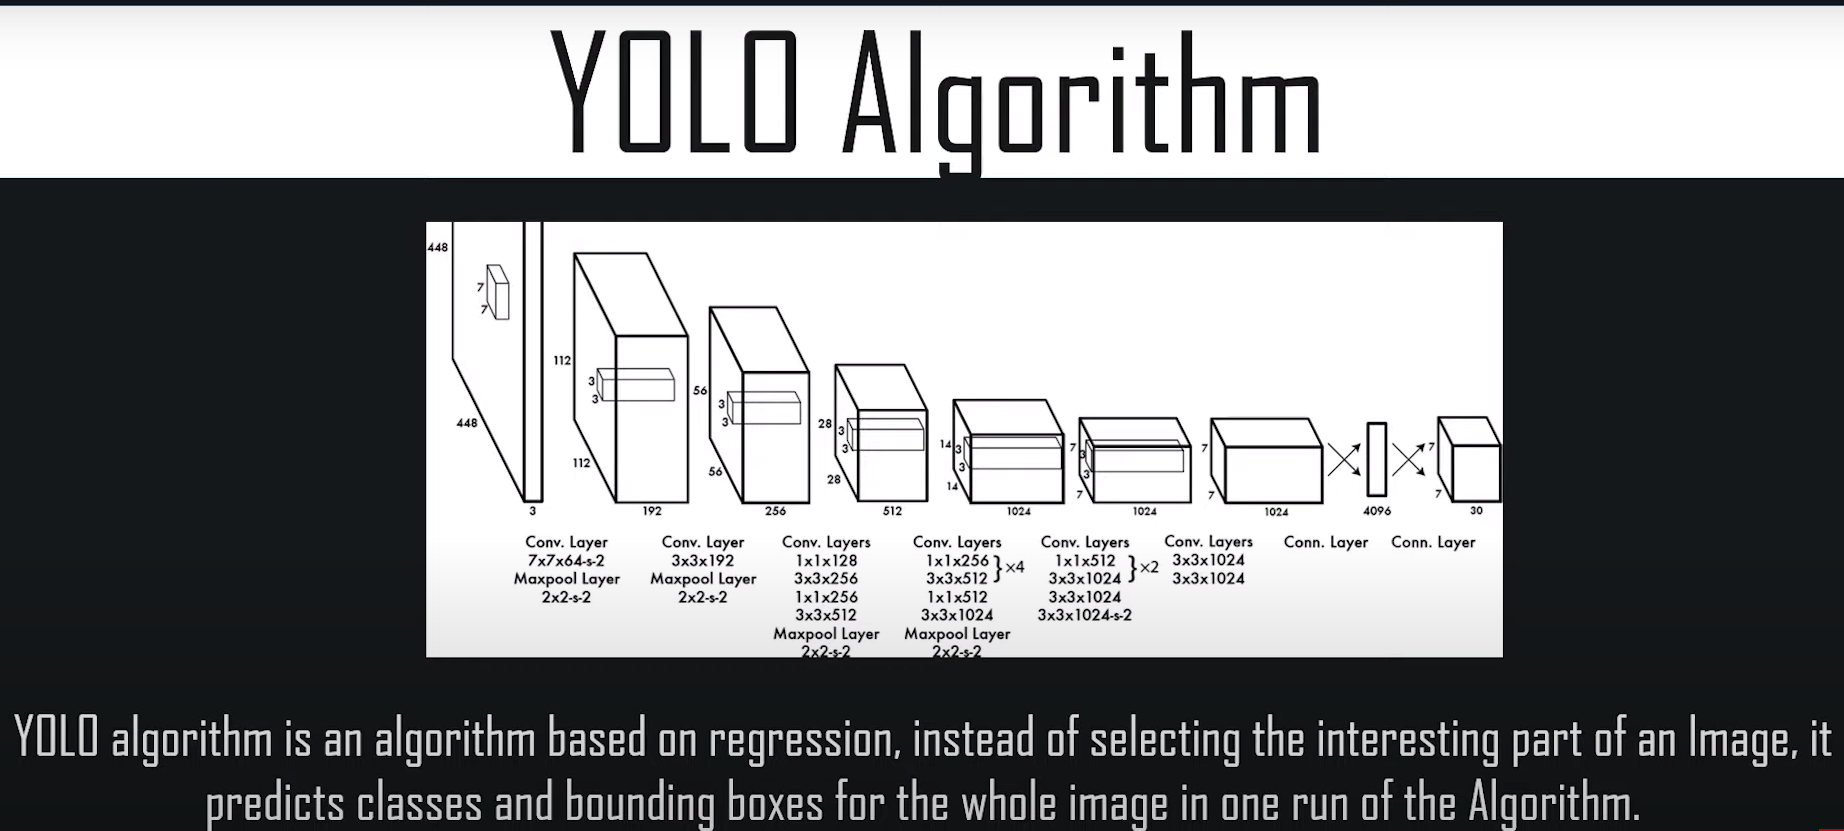

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#here we are using YOLOv3-416
yolo=cv.dnn.readNet("D:\programming languages\OpenCV\YOLO\yolov3.weights","D:\programming languages\OpenCV\YOLO\yolov3.cfg")

In [37]:
classes=[]
with open("D:\programming languages\OpenCV\YOLO\coco.names","r") as f:
    classes=f.read().splitlines()

In [38]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [39]:
len(classes)

80

In [40]:
#randomly creating 80 colors of each having 3 channels
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [41]:
len(colors)

80

In [42]:
colors[:5]

array([[ 71.43282943, 141.1409425 , 238.30035102],
       [145.94489548,  26.90221831, 243.49358431],
       [106.93226377,  87.66952575,  34.82132508],
       [ 44.39588646,  59.22619576, 110.4029773 ],
       [101.56941802,  12.419764  , 184.39222397]])

In [145]:
#reading an image
img=cv.imread(r"D:\programming languages\OpenCV\photoes\person_on_cycle.jpg")
img.shape

(586, 872, 3)

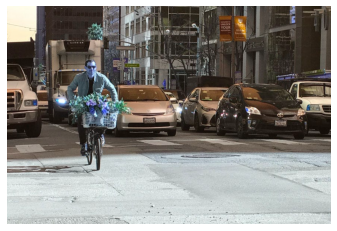

In [146]:
#displaying image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

In [147]:
#displaying image using cv2
cv.imshow("cat",img)
cv.waitKey(0)
cv.destroyAllWindows()

In [148]:
#use this code only when the image size is too big
"""img=cv.resize(img,(int(img.shape[1]*0.5),int(img.shape[0]*0.5)))
cv.imshow("cat",img)
cv.waitKey(0)
cv.destroyAllWindows()"""

'img=cv.resize(img,(int(img.shape[1]*0.5),int(img.shape[0]*0.5)))\ncv.imshow("cat",img)\ncv.waitKey(0)\ncv.destroyAllWindows()'

In [149]:
#The cv2.dnn.blobFromImage() function is used to preprocess an image before feeding it into a deep neural network (DNN) for object detection or other computer vision tasks.
blob=cv.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)
#The result of cv2.dnn.blobFromImage() is assigned to the variable blob, which represents the preprocessed image ready to be passed as input to the YOLOv3 network.

In [150]:
blob.shape

(1, 3, 416, 416)

In [151]:
#converting blob image to display it
blobed_img=blob[0].reshape(416,416,3)

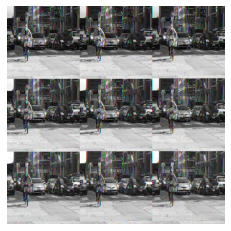

In [152]:
plt.imshow(blobed_img)
plt.axis('off')
plt.show()

In [153]:
yolo.setInput(blob)

In [154]:
# Forward pass through the network
output_layers_names=yolo.getUnconnectedOutLayersNames()
outputs=yolo.forward(output_layers_names)

In [177]:
output_layers_names

('yolo_82', 'yolo_94', 'yolo_106')

In [165]:
len(outputs)

3

In [167]:
outputs[0].shape

(507, 85)

In [168]:
outputs[1].shape

(2028, 85)

In [169]:
outputs[2].shape

(8112, 85)

In [170]:
# Extract bounding box information and confidence scores
boxes = []
confidences = []
class_ids = []

for output in outputs:
    for detection in output:
        #detection[0]: The center x-coordinate of the bounding box.
        #detection[1]: The center y-coordinate of the bounding box.
        #detection[2]: The width of the bounding box.
        #detection[3]: The height of the bounding box.
        #detection[4]: The objectness score, which indicates the confidence that an object is present within the bounding box.
        #detection[5:]: The class probabilities for each detected object class.
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            width = int(detection[2] * img.shape[1])
            height = int(detection[3] * img.shape[0])

            # Calculate top-left coordinates of bounding box
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)

            boxes.append([x, y, width, height])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [171]:
# Apply non-maxima suppression to remove overlapping bounding boxes
# NMS is a post-processing technique commonly employed in object detection tasks to remove duplicate or overlapping bounding boxes and retain only the most confident ones.
#The function takes the following parameters:

#bboxes: An array of bounding boxes. Each bounding box is represented as [x, y, w, h], where (x, y) denotes the top-left corner coordinates, and (w, h) represents the width and height of the bounding box.
#scores: An array of confidence scores corresponding to the bounding boxes.
#score_threshold: A threshold value that determines the minimum confidence score required for a bounding box to be considered for suppression.
#nms_threshold: A threshold value that determines the overlap required between two bounding boxes for suppression to be applied. Bounding boxes with overlap greater than this threshold will be suppressed.
#eta: A coefficient applied to the bounding box area calculation during suppression. It helps control the suppression behavior based on the box size.
indices = cv.dnn.NMSBoxes(bboxes=boxes, scores=confidences, score_threshold=0.5, nms_threshold=0.4)

In [176]:
indices.shape

(9,)

In [175]:
indices

array([ 7, 21, 23, 11, 25, 10, 13, 27,  9])

In [157]:
# Draw bounding boxes and labels
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        color = colors[class_ids[i]]

        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, f"{label}: {confidence:.2f}", (x, y - 10),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

In [158]:
# Display the output image
cv.imshow("Object Detection", img)
cv.waitKey(0)
cv.destroyAllWindows()

# Applying yolo algorithm on video

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
yolo=cv.dnn.readNet("D:\programming languages\OpenCV\YOLO\yolov3.weights","D:\programming languages\OpenCV\YOLO\yolov3.cfg")

In [5]:
classes=[]
with open("D:\programming languages\OpenCV\YOLO\coco.names","r") as f:
    classes=f.read().splitlines()

In [6]:
colors=np.random.uniform(0,255,(len(classes),3))
colors[0]

array([164.66246751,  26.13357194, 244.60624513])

In [1]:
def detect_objects_in_video(path=0):
    capture=cv.VideoCapture(path)
    while True:
        isTrue,frame=capture.read()
        if isTrue:
            blob=cv.dnn.blobFromImage(frame,1/255,(416,416),(0,0,0),swapRB=True,crop=False)
            yolo.setInput(blob)
            outputs=yolo.forward(yolo.getUnconnectedOutLayersNames())
            boxes=[]
            confidences=[]
            class_ids=[]
            for output in outputs:
                for prediction in output:
                    scores=prediction[5:]
                    class_id=np.argmax(scores)
                    confidence=scores[class_id]
                    if confidence>0.5:
                        center_x=int(prediction[0]*frame.shape[1])
                        center_y=int(prediction[1]*frame.shape[0])
                        width=int(prediction[2]*frame.shape[1])
                        height=int(prediction[3]*frame.shape[0])
                        x=int(center_x-width/2)
                        y=int(center_y-height/2)
                        boxes.append([x,y,width,height])
                        confidences.append(confidence)
                        class_ids.append(class_id)
            indices=cv.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
            if len(indices)>0:
                for i in indices.flatten():
                    x,y,w,h=boxes[i]
                    cv.rectangle(frame,(x,y),(x+w,y+h),colors[i],2)
                    cv.putText(frame,classes[class_ids[i]]+" : "+str(round(confidences[i],2)),(x,y-10),cv.FONT_HERSHEY_COMPLEX,1.0,colors[i],2)
            cv.imshow("Video",frame)
            if cv.waitKey(20) & 0xFF==ord('q'):
                break
        else:
            break
    capture.release()
    cv.destroyAllWindows()

In [10]:
detect_objects_in_video(r"D:\programming languages\OpenCV\photoes\videos\kitten.mp4")